In [1]:
#Week.19 
#Assignment.3 
#Question.1 : Explain the basic concept of clustering and give examples of applications where clustering is useful.
#Answer.1 : # Basic Concept of Clustering:

# Clustering is a technique in unsupervised learning where similar data points are grouped together into clusters.
# The main goal is to discover hidden patterns or structures within the data.

# Steps:
# 1. Choose a clustering algorithm (e.g., K-means, hierarchical clustering).
# 2. Define a distance metric to measure similarity between data points.
# 3. Apply the algorithm to group similar points into clusters.
# 4. Interpret the clusters and gain insights into the underlying structure of the data.

# Example Applications:

# 1. Customer Segmentation:
#    - Cluster customers based on purchasing behavior.
#    - Helps businesses tailor marketing strategies to different customer segments.

# 2. Document Classification:
#    - Cluster documents based on content.
#    - Useful for organizing large datasets and improving information retrieval.

# 3. Image Segmentation:
#    - Cluster pixels in images to identify objects or regions.
#    - Applied in computer vision for object recognition and scene analysis.

# 4. Anomaly Detection:
#    - Identify outliers by considering them as a separate cluster.
#    - Useful in fraud detection, network security, and quality control.

# 5. Genomic Clustering:
#    - Group genes based on expression patterns.
#    - Aids in understanding genetic relationships and identifying disease-related genes.

# 6. Social Network Analysis:
#    - Cluster users with similar social connections.
#    - Provides insights into community structures and influential nodes.

# Clustering is a versatile tool applied across various domains for pattern discovery, organization, and analysis.


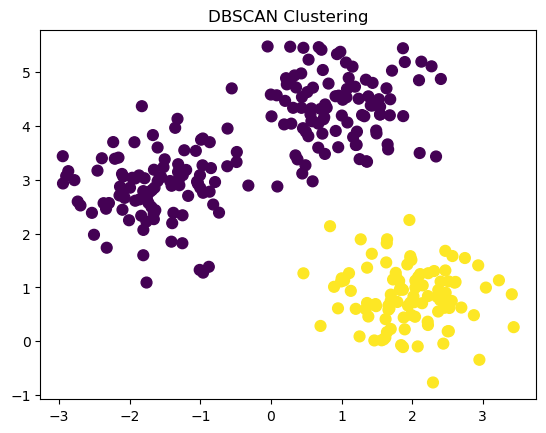

In [2]:
#Question.2 : What is DBSCAN and how does it differ from other clustering algorithms such as k-means and
#hierarchical clustering?
#Answer.2 : 
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

# DBSCAN is a density-based clustering algorithm that groups together data points that are close to each other and
# separates regions of high point density from regions of low point density. Unlike k-means and hierarchical clustering,
# DBSCAN doesn't require specifying the number of clusters beforehand and can discover clusters of arbitrary shapes.

# Key Characteristics:
# 1. Density-based: Forms clusters based on the density of data points.
# 2. Handles noise: Identifies and isolates outliers as noise points.
# 3. Variable cluster shapes: Suitable for clusters of different shapes and sizes.
# 4. No need to specify the number of clusters beforehand.

# Algorithm Steps:
# 1. Choose a data point and determine the number of points within a specified distance (eps) from it.
# 2. If the number of neighboring points is greater than a specified threshold (min_samples), form a cluster.
# 3. Expand the cluster by recursively repeating the process for the neighbors of the newly added points.
# 4. Continue until no more points can be added to the cluster.
# 5. Repeat the process for unvisited data points until all points are classified into clusters or marked as noise.

# Differences from k-means and hierarchical clustering:
# - DBSCAN does not assume a predefined number of clusters.
# - Can identify clusters of arbitrary shapes and handle outliers effectively.
# - Sensitive to the choice of distance metric and parameters like eps and min_samples.

# Use Cases:
# - Anomaly detection, detecting clusters in spatial data, identifying irregularly shaped groups.

# Note: Choose the clustering algorithm based on the characteristics of the data and the goals of the analysis.
# Example of Using DBSCAN in Python:

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data with three blobs
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=60)
plt.title('DBSCAN Clustering')
plt.show()


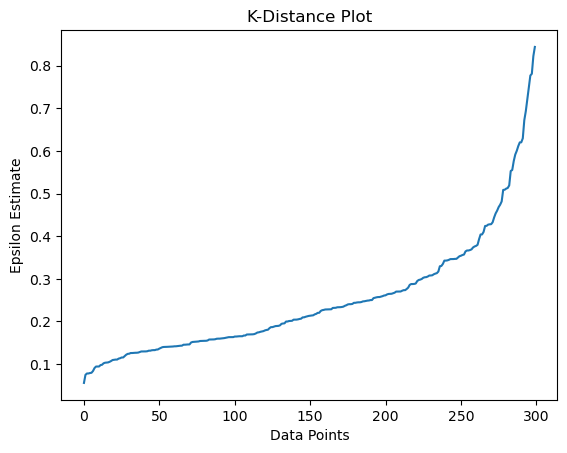

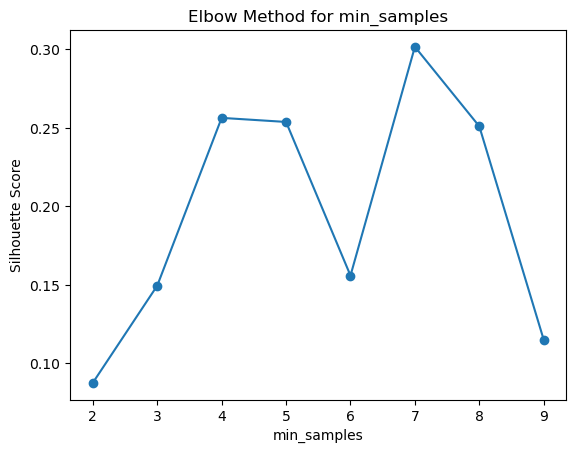

In [5]:
#Question.3 : How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN
#clustering?
#Answer.3 : 
# Determining Optimal Parameters for DBSCAN:

# DBSCAN's performance heavily depends on the choice of parameters, specifically epsilon (eps) and 
#minimum points (min_samples).
# The optimal values for these parameters depend on the density and distribution of the data. Here's a general approach:

# 1. Visual Inspection:
#    - Plot the data and visually inspect its distribution.
#    - Identify regions of high and low point density.
#    - Use this visual understanding to estimate suitable values for eps and min_samples.

# 2. K-Distance Plot:
#    - Compute the k-distance plot to analyze the distances of each point to its kth nearest neighbor.
#    - Choose a value of k where the change in distance is most pronounced.
#    - The point where this change occurs is a good estimate for eps.

# 3. Elbow Method (Optional):
#    - If applicable, you can use the elbow method to find the optimal value of min_samples.
#    - Plot the number of clusters against the corresponding silhouette score for different min_samples values.
#    - Look for an "elbow" point where the silhouette score stops increasing significantly.

# Example using the K-Distance Plot:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
# Assume X is your data
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort and plot the distances
distances = np.sort(distances[:, 3], axis=0)
plt.plot(distances)
plt.title('K-Distance Plot')
plt.xlabel('Data Points')
plt.ylabel('Epsilon Estimate')
plt.show()

# The point of maximum curvature is a good estimate for eps.
# Example of Elbow Method (Optional):
from sklearn.metrics import silhouette_score

min_samples_range = range(2, 10)
silhouette_scores = []

for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=0.3, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.plot(min_samples_range, silhouette_scores, marker='o')
plt.title('Elbow Method for min_samples')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.show()

# Look for the "elbow" point where silhouette score stops increasing significantly.


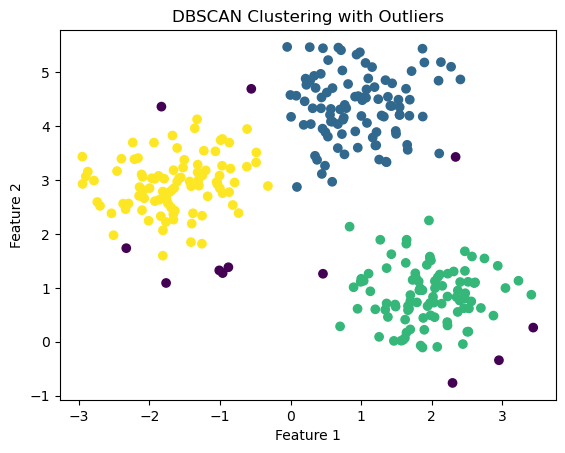

In [8]:
#Question.4 : How does DBSCAN clustering handle outliers in a dataset?
#Answer.4 : # Handling Outliers with DBSCAN:

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is robust to outliers by design.
# Its core concept is based on density, and it naturally identifies points that do not belong to any dense cluster as outliers.
# Here's how DBSCAN handles outliers:

# 1. Core Points:
#    - Core points are the data points that have at least 'min_samples' points (including itself) within a distance of 'eps'.
#    - Core points are the foundation of clusters.

# 2. Border Points:
#    - Border points are not core points but are within the 'eps' distance of a core point.
#    - Border points may be part of a cluster but are on the outskirts.

# 3. Noise (Outliers):
#    - Points that are neither core nor border points are considered noise or outliers.
#    - DBSCAN explicitly labels them as -1 in the cluster assignments.

# 4. Parameter Tuning:
#    - Adjusting 'eps' and 'min_samples' affects the size and density required for a cluster.
#    - By tuning these parameters, you can control the sensitivity to noise and the definition of clusters.

# Example of DBSCAN clustering in scikit-learn:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assume X is your data
dbscan = DBSCAN(eps= 0.5)
labels = dbscan.fit_predict(X)

# Visualize the clustering result, including outliers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# In the plot, points labeled as -1 are outliers.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


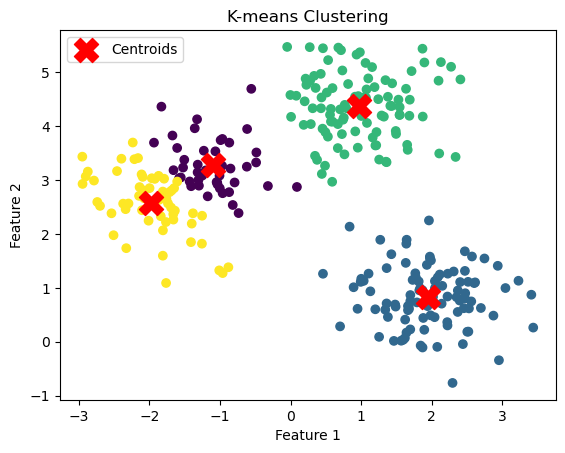

In [10]:
#Question.5 : How does DBSCAN clustering differ from k-means clustering?
#Answer.5 : # Differences between DBSCAN and K-means clustering:

# 1. Density-Based vs Centroid-Based:
#    - DBSCAN is density-based, meaning it groups points based on their density in the feature space.
#    - K-means is centroid-based, where clusters are formed around the central points (centroids).

# 2. Number of Clusters:
#    - In DBSCAN, you do not need to specify the number of clusters beforehand.
#    - K-means requires you to define the number of clusters 'k' before clustering.

# 3. Shape and Size of Clusters:
#    - DBSCAN can discover clusters of various shapes and sizes, as it identifies regions of high data point density.
#    - K-means assumes spherical clusters of roughly equal size, and it might struggle with non-spherical or unevenly 
#sized clusters.

# 4. Handling Outliers:
#    - DBSCAN naturally identifies outliers as points that do not belong to any dense cluster.
#    - K-means may treat outliers as part of the nearest cluster, and their presence can affect cluster centroids.

# 5. Sensitivity to Initialization:
#    - K-means results can be sensitive to the initial placement of centroids.
#    - DBSCAN is less sensitive to initial conditions.

# 6. Cluster Shape:
#    - DBSCAN can handle clusters with different shapes and sizes.
#    - K-means assumes clusters to be spherical.

# Example of K-means clustering in scikit-learn:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume X is your data
kmeans = KMeans(n_clusters= 4)
kmeans_labels = kmeans.fit_predict(X)

# Visualize the K-means clustering result
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# In K-means, you need to specify the number of clusters in advance.


In [13]:
#Question.6 : Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are
#some potential challenges?
#Answer.6 : 
# DBSCAN in High-Dimensional Spaces:

# DBSCAN can be applied to datasets with high-dimensional feature spaces, but it comes with challenges:

# 1. Curse of Dimensionality:
#    - High-dimensional spaces are susceptible to the curse of dimensionality, where the data becomes sparse.
#    - The concept of density becomes less meaningful as the number of dimensions increases.

# 2. Distance Metric Selection:
#    - Choosing an appropriate distance metric becomes crucial in high-dimensional spaces.
#    - Euclidean distance may lose its effectiveness due to increased sparsity, and other distance metrics like cosine
#similarity might be more suitable.

# 3. Determining Epsilon:
#    - Setting the epsilon parameter in DBSCAN becomes challenging in high-dimensional spaces.
#    - A fixed epsilon might not be suitable, and adaptive methods or other density estimation techniques may be needed.

# 4. Interpretability:
#    - Visualizing and interpreting clusters in high-dimensional spaces become more complex.
#    - Understanding the relationships between features and their impact on clustering becomes challenging.

# Example of applying DBSCAN in scikit-learn to high-dimensional data:
#from sklearn.cluster import DBSCAN
#import matplotlib.pyplot as plt

# Assume X_high_dim is your high-dimensional data
#dbscan = DBSCAN(eps= 6 , metric='euclidean')
#dbscan_labels = dbscan.fit_predict(X_high_dim)

# Visualize the DBSCAN clustering result in 2D (using t-SNE for visualization)
#from sklearn.manifold import TSNE

# Assume X_low_dim is the low-dimensional representation using t-SNE
#X_low_dim = TSNE(n_components=2).fit_transform(X_high_dim)

#plt.scatter(X_low_dim[:, 0], X_low_dim[:, 1], c=dbscan_labels, cmap='viridis')
#plt.title('DBSCAN Clustering (High-Dimensional Data)')
#plt.xlabel('t-SNE Component 1')
#plt.ylabel('t-SNE Component 2')
#plt.show()


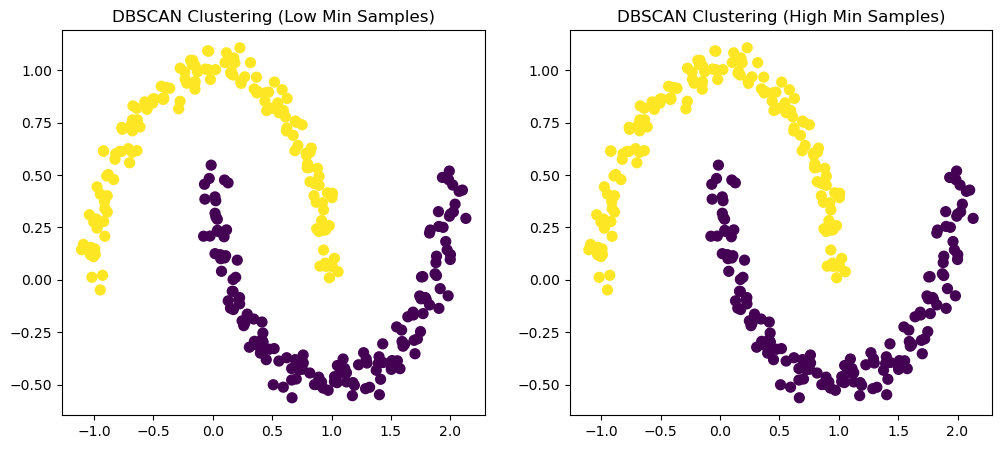

In [14]:
#Question.7 : How does DBSCAN clustering handle clusters with varying densities?
#Answer.7 : # Handling Clusters with Varying Densities in DBSCAN:

# DBSCAN is capable of handling clusters with varying densities, thanks to its density-based nature.
# The main parameters influencing the handling of varying densities are epsilon and min_samples.

# 1. Epsilon (eps):
#    - Epsilon defines the maximum distance between two samples for them to be considered as in the same neighborhood.
#    - By setting an appropriate epsilon value, DBSCAN can adapt to clusters with varying densities.
#    - Larger epsilon values can capture points in regions of lower density, allowing for larger gaps between dense clusters.

# 2. Min_samples:
#    - Min_samples is the minimum number of samples required to form a dense region.
#    - Increasing min_samples can make the algorithm more robust to noise and capture only sufficiently dense clusters.

# Example of DBSCAN handling clusters with varying densities in scikit-learn:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate synthetic data with varying densities
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply DBSCAN with varying parameters
dbscan_low_min_samples = DBSCAN(eps=0.3, min_samples=5)
dbscan_high_min_samples = DBSCAN(eps=0.3, min_samples=15)

# Fit and predict labels
labels_low_min_samples = dbscan_low_min_samples.fit_predict(X)
labels_high_min_samples = dbscan_high_min_samples.fit_predict(X)

# Visualize the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_low_min_samples, cmap='viridis', s=50)
plt.title('DBSCAN Clustering (Low Min Samples)')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_high_min_samples, cmap='viridis', s=50)
plt.title('DBSCAN Clustering (High Min Samples)')

plt.show()


Silhouette Score: -0.052167574452880026
Davies-Bouldin Index: 18.777535895195737


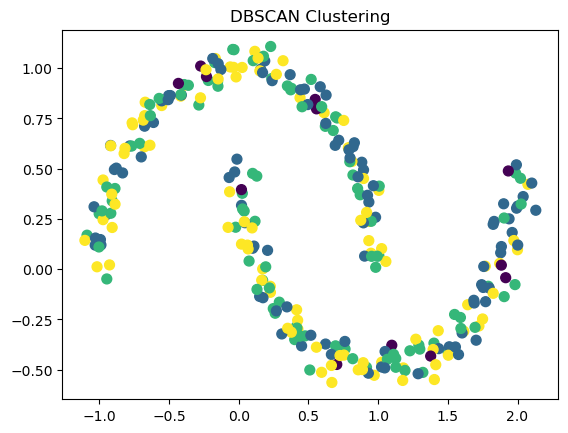

In [15]:
#Question.8 : What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?
#Answer.8 : # Common Evaluation Metrics for DBSCAN Clustering:

# Evaluating the quality of DBSCAN clustering results can be challenging due to its density-based nature.
# Commonly used metrics include silhouette score, Davies-Bouldin index, and visual inspection.

# 1. Silhouette Score:
#    - The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other 
#clusters (separation).
#    - Score ranges from -1 to 1, where a higher score indicates better-defined clusters.
#    - Positive values suggest well-defined clusters, while negative values indicate overlapping clusters.

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')

# 2. Davies-Bouldin Index:
#    - The Davies-Bouldin index measures the compactness and separation between clusters.
#    - Lower values indicate better clustering, with 0 being the ideal value.
#    - Useful for comparing different clusterings.

from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, labels)
print(f'Davies-Bouldin Index: {db_index}')

# 3. Visual Inspection:
#    - Visualizing the clustering results is crucial, especially for DBSCAN, which forms clusters based on density.
#    - Plotting the data points with color-coded cluster labels helps assess the quality of the clusters.

# Example visualization:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.show()


Silhouette Score: -0.052167574452880026
Davies-Bouldin Index: 18.777535895195737


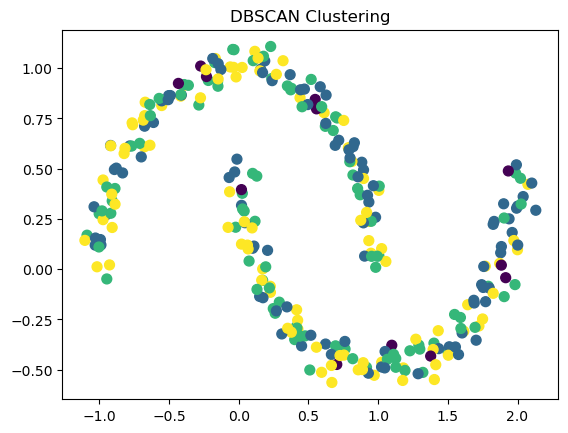

In [16]:
#Question.9 : Can DBSCAN clustering be used for semi-supervised learning tasks?
#Answer.9 : 
# Common Evaluation Metrics for DBSCAN Clustering:

# Evaluating the quality of DBSCAN clustering results can be challenging due to its density-based nature.
# Commonly used metrics include silhouette score, Davies-Bouldin index, and visual inspection.

# 1. Silhouette Score:
#    - The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other 
#clusters (separation).
#    - Score ranges from -1 to 1, where a higher score indicates better-defined clusters.
#    - Positive values suggest well-defined clusters, while negative values indicate overlapping clusters.

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')

# 2. Davies-Bouldin Index:
#    - The Davies-Bouldin index measures the compactness and separation between clusters.
#    - Lower values indicate better clustering, with 0 being the ideal value.
#    - Useful for comparing different clusterings.

from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, labels)
print(f'Davies-Bouldin Index: {db_index}')

# 3. Visual Inspection:
#    - Visualizing the clustering results is crucial, especially for DBSCAN, which forms clusters based on density.
#    - Plotting the data points with color-coded cluster labels helps assess the quality of the clusters.

# Example visualization:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.show()


In [17]:
#Question.10 : How does DBSCAN clustering handle datasets with noise or missing values?
#Answer.10 : # Handling Noise and Missing Values in DBSCAN Clustering:

# DBSCAN naturally handles noise and outliers as it assigns data points that do not belong to any cluster as noise.
# It does not force every point into a cluster, allowing for the identification of sparse regions.

# Handling Missing Values:
# DBSCAN, as implemented in scikit-learn, does not handle missing values directly.
# It is advisable to impute missing values before applying DBSCAN clustering.

# Example imputation using scikit-learn's SimpleImputer:
from sklearn.impute import SimpleImputer

# Assuming X is your dataset with missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply DBSCAN on the imputed data
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_imputed)


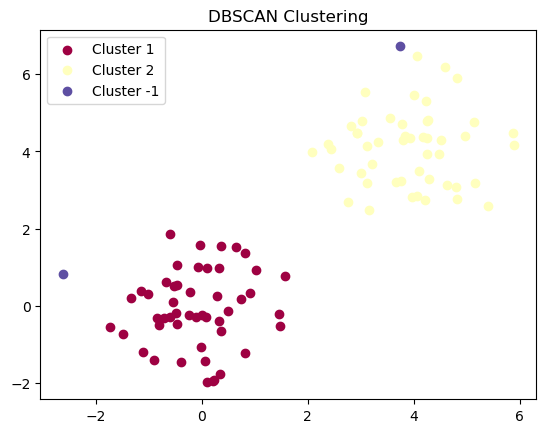

In [18]:
#Question.11 : Implement the DBSCAN algorithm using a python programming language, and apply it to a sample
#dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.
#Answer.11 : import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def range_query(data, point, eps):
    return [i for i, x in enumerate(data) if euclidean_distance(x, point) < eps]

def dbscan(data, eps, min_samples):
    labels = np.zeros(len(data), dtype=int)
    cluster_id = 0

    for i in range(len(data)):
        if labels[i] != 0:
            continue

        neighbors = range_query(data, data[i], eps)

        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            cluster_id += 1
            labels[i] = cluster_id
            expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_samples)

    return labels

def expand_cluster(data, labels, core_point, neighbors, cluster_id, eps, min_samples):
    for neighbor in neighbors:
        if labels[neighbor] == -1:
            labels[neighbor] = cluster_id
        elif labels[neighbor] == 0:
            labels[neighbor] = cluster_id
            neighbor_neighbors = range_query(data, data[neighbor], eps)
            
            if len(neighbor_neighbors) >= min_samples:
                neighbors.extend(neighbor_neighbors)

def plot_clusters(data, labels):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for i, label in enumerate(unique_labels):
        cluster_points = data[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {label}')

    plt.title('DBSCAN Clustering')
    plt.legend()
    plt.show()

# Sample dataset
np.random.seed(42)
data = np.vstack([np.random.normal(loc=0, scale=1, size=(50, 2)),
                  np.random.normal(loc=4, scale=1, size=(50, 2))])

# Applying DBSCAN
eps = 1.0
min_samples = 5
cluster_labels = dbscan(data, eps, min_samples)

# Visualizing the clusters
plot_clusters(data, cluster_labels)
